In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import math

data = pd.read_csv('인사이콘3_Data.csv')
data.head()

,RESPID,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
0,23822,5,1,5,5,5,5,5,3,5,...,4,4,4,4,5,4,4,4,0,1
1,224795,3,2,4,4,4,4,5,3,4,...,4,3,3,4,3,3,3,3,1,1
2,20952,3,1,4,4,5,4,4,2,4,...,5,3,3,5,2,4,3,5,1,0
3,5612,5,2,3,4,5,5,3,3,3,...,4,4,4,4,2,5,5,4,1,0
4,15016,4,2,4,5,5,4,5,4,5,...,4,4,5,5,3,4,5,4,0,0


In [10]:
data.groupby('Q16')[['Q16.1','Q16.2','Q16.3','Q16.4','Q16.5','Q16.6','Q16.7','Q16.8','Q16.9',
                     'Q16.10','Q16.11','Q16.12','Q16.13','Q16.14','Q16.15','Q16.16','Q16.17',
                     'Q16.18','Q16.19','Q16.20','Q16.21','Q16.22','Q16.23','Q16.24','Q16.25',
                     'Q16.26','Q16.27']].count()

,Q16.1,Q16.2,Q16.3,Q16.4,Q16.5,Q16.6,Q16.7,Q16.8,Q16.9,Q16.10,...,Q16.18,Q16.19,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27
Q16,,,,,,,,,,,,,,,,,,,,,
1,133,133,133,133,133,133,133,133,133,133,...,133,133,133,133,133,133,133,133,133,133
2,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
3,267,267,267,267,267,267,267,267,267,267,...,267,267,267,267,267,267,267,267,267,267
4,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
5,221,221,221,221,221,221,221,221,221,221,...,221,221,221,221,221,221,221,221,221,221
6,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
7,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
8,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
9,88,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,88,88


In [ ]:
bin_data = data[['Q16']]
bin_data['Q16'] = pd.cut(data['Q16'], bins=[0, 10, 50, 100], labels=["Low", "Mid", "High"])
bin_data

In [2]:
data_cleaning = data.copy()

data_cleaning = data_cleaning[['Q1.1','Q1.2','Q1.3','Q1.4','Q1.5','Q1.6','Q1.7','Q1.8','Q1.9','Q1.10',
                               'Q1.11','Q1.12','Q1.13','Q1.14','Q1.15','Q1.16','Q1.17','Q1.18','Q1.19',
                               'Q1.20','Q1.21','Q1.22','Q1.23','Q1.24','Q1.25','Q1.26','Q1.27','Q1.28',
                               'Q1.29']]

<AxesSubplot:>

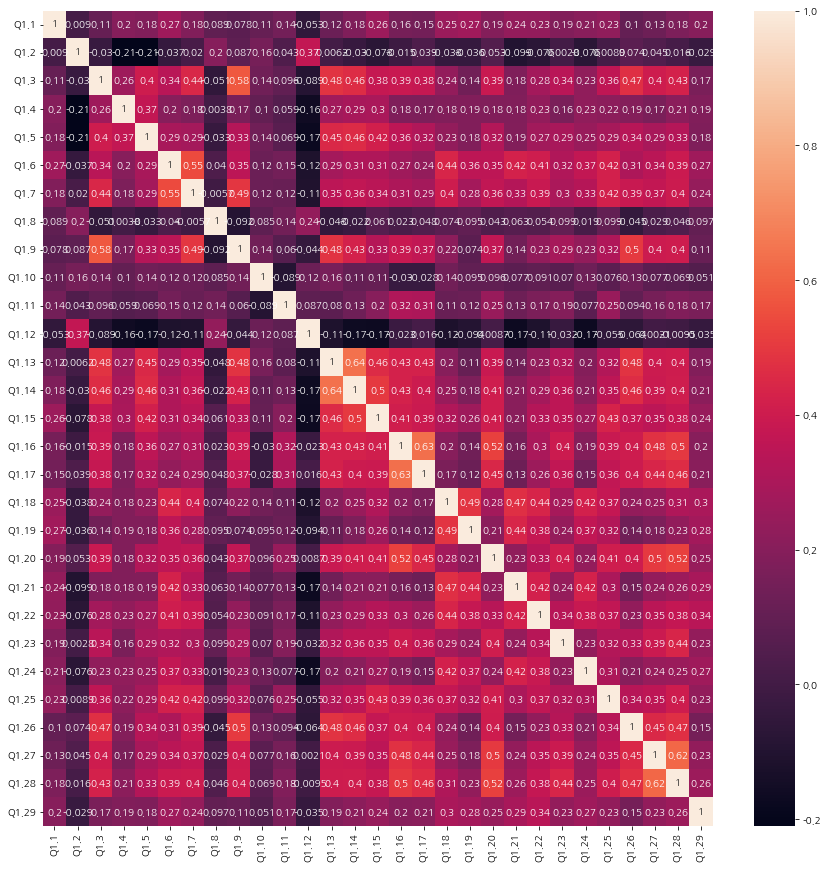

In [5]:
corr = data_cleaning.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,fmt='.2g')

In [ ]:
data_cleaning = data_cleaning[['Q1.1','Q1.2','Q1.8','Q1.10','Q1.11','Q1.12','Q1.13','Q1.18','Q1.21','Q1.22','Q1.23','Q1.24','Q1.25','Q1.29']]